In [2]:
# 모듈 로딩
from tensorflow.keras import Sequential  # 모델 객체
from tensorflow.keras.layers import Dense  # 레이어 객체
from tensorflow.keras.datasets.boston_housing import load_data
import tensorflow as tf
import numpy as np

## [1] 데이터 로딩
---

In [4]:
# 학습용, 테스트용 = 8 : 2
(x_train, y_train), (x_test, y_test)=load_data()

In [5]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [7]:
x_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]),
 15.2)

### [1-1] 전처리
---
- 특성(Feature) 전처리
    * 수치 데이터 : 값의 범위
    * 문자 데이터 : 수치화

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [66]:
scaler=StandardScaler()

In [67]:
scaler.fit(x_train)

StandardScaler()

In [68]:
scaler.mean_, scaler.scale_

(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

In [69]:
x_train_scaled=scaler.transform(x_train)

In [70]:
x_test_scaled=scaler.transform(x_test)

## [2] NN Model 실습
---
- (1) 모델 구상
- (2) 모델 생성
- (3) 학습
- (4) 평가
- (5) 테스트

### [2-1] 모델 구상
- 입력 데이터 => 13개 Feature
- 출력 데이터 => 1개(집값)

In [8]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model=Sequential(name='Boston')

In [9]:
# Layer 추가하기
model.add(Dense(30, activation='relu', input_shape=(13, ), name='hidden-1'))
model.add(Dense(10, activation='relu', name='hidden-2'))

# 과적합을 해결하기 위해서 Dropout() 사용, 지정된 비율만큼 랜덤으로 node를 비활성화
model.add(Dropout(0.5))
# 회귀 => 출력층
model.add(Dense(1, activation='linear',name='output'))


In [10]:
# 모델 구성 확인
model.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### [2-2] 모델 생성
---
- Sequential 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정
    * 오차 계산 함수 설정 => loss
    * W, b 최적화 방식 설정 => optimizer
    * 모델의 성능 측정 항목 설정 => metrics
- 파라미터 값들
    * str 타입으로 입력 가능
    * 객체 타입으로 입력 가능

In [36]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

### [2-3] 모델 학습
---
- fit() 메서드
    * 파라미터
    * 반환값 => History 객체

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
# 검증 데이터에 대한 loss 값 3번 연속 개선되지 않으면 학습 중지
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [58]:
result=model.fit(x_train, y_train, epochs=1000, batch_size=10,
                 validation_data=(x_test, y_test),
                callbacks=[stopCB])
                #validation_split=0.2)

Epoch 1/1000
41/41 [==============================] - 0s 2ms/step - loss: 25.2116 - mae: 3.4535 - val_loss: 24.5797 - val_mae: 3.5719
Epoch 2/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.3298 - mae: 3.5055 - val_loss: 24.1350 - val_mae: 3.5357
Epoch 3/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.5732 - mae: 3.5351 - val_loss: 24.5159 - val_mae: 3.5637
Epoch 4/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.0262 - mae: 3.4288 - val_loss: 24.0496 - val_mae: 3.5290
Epoch 5/1000
41/41 [==============================] - 0s 1ms/step - loss: 25.7867 - mae: 3.4991 - val_loss: 25.6154 - val_mae: 3.6952
Epoch 6/1000
41/41 [==============================] - 0s 1ms/step - loss: 24.8495 - mae: 3.4280 - val_loss: 25.5656 - val_mae: 3.6878
Epoch 7/1000
41/41 [==============================] - 0s 1ms/step - loss: 26.6350 - mae: 3.6102 - val_loss: 24.7521 - val_mae: 3.5893


In [48]:
# 학습 후 학습 결과 체크 => History 객체
type(result)

keras.callbacks.History

In [49]:
result.params

{'verbose': 1, 'epochs': 1000, 'steps': 41}

In [50]:
result.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [51]:
result.history['loss']

[176.5362548828125,
 170.04652404785156,
 164.1788330078125,
 157.97918701171875,
 155.1401824951172,
 152.41006469726562,
 145.8727264404297,
 140.53350830078125,
 137.9839630126953,
 135.20248413085938,
 132.3217315673828,
 128.61721801757812,
 125.94390869140625,
 121.42118835449219,
 120.85978698730469,
 116.95569610595703,
 114.61576843261719,
 113.14109802246094,
 110.80432891845703,
 109.74742126464844,
 108.31466674804688,
 104.60474395751953,
 103.59703826904297,
 101.42984008789062,
 99.1389389038086,
 96.23558044433594,
 94.37672424316406,
 92.23707580566406,
 91.25166320800781,
 89.97591400146484,
 87.36162567138672,
 86.4869384765625,
 85.28050231933594,
 83.73723602294922,
 83.22201538085938,
 81.9546890258789,
 79.80333709716797,
 78.8935317993164,
 77.47015380859375,
 77.70439910888672,
 74.87467956542969,
 74.3387680053711,
 72.58609008789062,
 72.17157745361328,
 70.13788604736328,
 70.44122314453125,
 69.2416000366211,
 69.94071960449219,
 67.84766387939453,
 66.2509

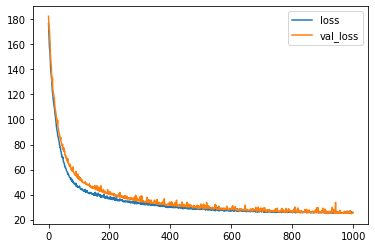

In [54]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(result.epoch, result.history['loss'], label='loss')
#plt.plot(result.epoch, result.history['mae'], label='mae')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [33]:
result.history['accuracy']

[0.0, 0.0, 0.0]

### [2-4] 평가
---
- evaluate() 메서드
    * 파라미터 : test_data, test_target
    * 반환값 : loss, compile()의 metrics에서 설정한 항목 값

In [59]:
eRet=model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 997us/step - loss: 24.7521 - mae: 3.5893


In [60]:
eRet

[24.75214195251465, 3.5893402099609375]

### [2-5] 예측
---
- predict()

In [61]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 70ms/step


array([[16.753056]], dtype=float32)